
<h4 id="Université-de-Bordeaux,--Master-Mention-Informatique,--2021-2022">Université de Bordeaux,  Master Mention Informatique,  2021-2022<a class="anchor-link" href="#Université-de-Bordeaux,--Master-Mention-Informatique,--2021-2022">¶</a></h4><h1 id="Analyse,-classification-et-indexation-des-données:-feuille-5">Analyse, classification et indexation des données: feuille 5<a class="anchor-link" href="#Analyse,-classification-et-indexation-des-données:-feuille-5">¶</a></h1><h3 id="Classifieur-bayésien">Classifieur bayésien<a class="anchor-link" href="#Classifieur-bayésien">¶</a></h3>



<p>Dans la première partie de ce TD on s’appuie sur l’exemple du cours qui consiste à séparer des poissons en deux classes : bars et saumons. La classification sera faite à partir d’une seule caractéristique (la longueur) dans un premier temps, puis à partir de deux caractéristiques (longueur et brillance). En d’autres termes, le descripteur sera d’abord de dimension 1 puis de dimension 2.</p>



<h4 id="Données">Données<a class="anchor-link" href="#Données">¶</a></h4><p>Dans cet exercice, nous allons travailler avec un fichier (<code>salmon_seabass.csv</code>) contenant des informations sur la longueur et la brillance de deux classes de poissons : les saumons et les bars.
Le fichier est disponible à l'adresse :</p>
<p><a href="">https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv</a></p>
<ol>
<li><p>Chargez le fichier, et notez que la colonne <code>species</code> indique la catégorie du poisson :</p>
<ul>
<li>0 : il s'agit d'un saumon </li>
<li>1 : il s'agit d'un bar</li>
</ul>
</li>
</ol>


In [2]:
import numpy as np
import pandas as pa

data = pa.read_csv("https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv",delimiter=';')
print(data)

      lightness      width  species
0      9.710457   8.673699        0
1      6.528089   7.330887        0
2      1.770695   7.599677        0
3      4.819293   7.328198        0
4      6.769638   8.575629        0
5      3.623250   7.221906        0
6      6.591439   6.936439        0
7      2.924506   8.552978        0
8      5.196399   7.576571        0
9      8.047453   8.361587        0
10     5.748465   7.648111        0
11     7.478014   8.269541        0
12     5.131060   5.435551        0
13     3.639385   8.465864        0
14     6.027113   9.853561        0
15     5.107381   9.039289        0
16     9.260234   8.910897        0
17     3.360798   7.760269        0
18     5.197977   8.180998        0
19     2.076537   8.244250        0
20     8.253996   8.096393        0
21     6.320875   7.169532        0
22     7.834209   7.647748        0
23     4.493539   7.825225        0
24     5.900847   7.519347        0
25     7.602731   8.836837        0
26     4.413365  10.538349  


<ol>
<li>Affichez le nombre de valeurs fournies pour chacune des deux classes. On les nommera <code>sizeVTSaumon</code>
et <code>sizeVTBar</code>. </li>
</ol>


In [98]:
data.groupby(['species']).size()


species
0    1000
1     500
dtype: int64


<h3 id="Exercice-1.-classifieur-avec-une-seule-dimension">Exercice 1. classifieur avec une seule dimension<a class="anchor-link" href="#Exercice-1.-classifieur-avec-une-seule-dimension">¶</a></h3><p>Dans un premier temps, nous allons considérer un seul descripteur : la longueur <code>width</code> des poissons.</p>



<ol>
<li>Mélanger les données.</li>
</ol>


In [4]:
data = data.sample(frac=1)
data

,lightness,width,species
196,5.589194,7.274202,0
146,1.316884,8.460789,0
115,5.428143,7.463178,0
998,5.670677,7.873989,0
552,6.202780,8.657480,0
885,4.584630,8.272066,0
1312,8.641564,16.324768,1
305,5.967460,7.696245,0
15,5.107381,9.039289,0
1470,14.974302,12.723684,1



<ol>
<li>Créer deux variables $X$ et $y$ respectivement la longueur du poisson et son espèce</li>
</ol>


In [5]:
X = data['width']
y = data['species']
X

196      7.274202
146      8.460789
115      7.463178
998      7.873989
552      8.657480
885      8.272066
1312    16.324768
305      7.696245
15       9.039289
1470    12.723684
309      8.522018
792      7.540105
339      7.762873
235      6.924765
140      7.691375
382      7.889822
71       7.465901
1276    11.653192
1344    12.738974
1403    14.702193
833      7.151531
1181    11.439434
515      8.967983
1008     6.402036
174      7.956011
223      8.222614
913      8.179802
369      7.241373
1208    13.231374
834      7.759629
          ...    
1237    11.982484
1038    18.932520
526      7.066366
702      7.440939
47      10.106630
12       5.435551
501      8.413149
508      7.203616
635      6.046066
595      7.778855
883      7.511098
985     10.974474
418      8.687754
268      7.209742
1289    12.173867
1202     9.290422
872      7.472223
662      8.240575
698      8.497900
711      8.246450
195      7.595818
1420    17.073480
1192    15.806553
728      7.187303
705      7


<ol>
<li>Découper les données en deux parties : 80% pour l'entrainement et 20% pour le test.</li>
</ol>


In [78]:
nb_e = int(data.shape[0] * 80 / 100)
nb_t = int(data.shape[0] * 20 / 100)

x_train = X[nb_e:]
x_test = X[:nb_t]
y_train = y[nb_e:]
y_test = y[:nb_t]





<h4 id="1.1.-Classifieur-ML">1.1. Classifieur ML<a class="anchor-link" href="#1.1.-Classifieur-ML">¶</a></h4><ol>
<li>Calculer les estimateurs non biaisés de la moyenne et de l'écart type pour chacune des espèces de poisson. Attention, il faut travailler sur la portion d'entraînement du dataset.  </li>
</ol>


In [96]:
saumon = x_train[y_train == 0]
bar = x_train[y_train == 1]
moyenne_saumon = np.mean(saumon)
moyenne_bar = np.mean(bar)
ecartt_saumon = np.std(saumon)
ecartt_bar = np.std(bar)

ecartt_bar

2.244113397866575


<ol>
<li>Dessiner les courbes des lois normales correspondant à la fonction de maximum de vraisemblance. Indiquer la frontière de décision. Quelle est l'espèce prédite d'un poisson de longueur 12 ?</li>
</ol>


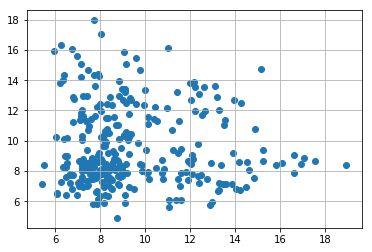

In [101]:
import matplotlib.pyplot as plt

plt.grid()
plt.scatter(x_train, x_test)


<ol>
<li>Evaluer la qualité du modèle entrainé.</li>
</ol>



<h4 id="1.2.-Classifieur-MAP">1.2. Classifieur MAP<a class="anchor-link" href="#1.2.-Classifieur-MAP">¶</a></h4><ol>
<li>Ecrire une fonction <code>classify()</code> permettant également de classifier les poissons mais en utilisant cette fois un classifieur a posteriori.</li>
</ol>



<ol>
<li>Evaluer ce classifieur </li>
</ol>



<h3 id="Exercice-2.-Classifieur-avec-deux-descripteurs">Exercice 2. Classifieur avec deux descripteurs<a class="anchor-link" href="#Exercice-2.-Classifieur-avec-deux-descripteurs">¶</a></h3>



<p>Dans cet exercice, nous allons considérer le dataset dans sa globalité. Nous allons donc baser notre classification sur les deux descripteurs <code>width</code> et <code>lightness</code>.</p>
<p>Reprogrammer et tester les deux classifieurs vus dans l'exercice 1. Quel est l'impact du rajout du nouveau descripteur ?</p>



<h3 id="Exercice-3.-Bayes-avec-sklearn">Exercice 3. Bayes avec <code>sklearn</code><a class="anchor-link" href="#Exercice-3.-Bayes-avec-sklearn">¶</a></h3>



<p>Comparer vos résultats avec ceux obtenus avec un classifieur de Bayes de la bibliothèque <code>sklearn</code>.</p>
